# STINTSY MCO

In [16]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# load the data
data = pd.read_csv('dataset/pumpkin_seeds.csv', encoding='latin1')

# Section 1: Introduction
(Possible problem statement)
In the agricultural industry, the ability to classify pumpkin seeds by type is essential for efficient seed sorting, quality control, and market distribution. Accurate seed type identification allows farmers and distributors to ensure that the seeds meet specific requirements for growth, yield, and commercial viability.

In this project, we aim to develop a machine learning model to classify pumpkin seeds into two primary types: Cercevelik and Urgup Sivrisi. Using a dataset that includes various morphological features of the seeds—such as area, perimeter, axis lengths, compactness, and eccentricity—we will explore, preprocess, and analyze the data to build a robust classification model. This model should be able to accurately predict the type of a pumpkin seed based on its physical characteristics, providing a valuable tool for farmers and agricultural businesses to streamline the sorting and distribution process.

# Section 2: Description of the dataset

In [18]:
print(data.dtypes)

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Convex_Area            int64
Equiv_Diameter       float64
Eccentricity         float64
Solidity             float64
Extent               float64
Roundness            float64
Aspect_Ration        float64
Compactness          float64
Class                 object
dtype: object


In [19]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik


| Attribute             | Description                                                                                           | Data Type |
|-----------------------|-------------------------------------------------------------------------------------------------------|-----------|
| **Area**              | Number of pixels within the borders of a pumpkin seed                                                 | int64     |
| **Perimeter**         | Circumference in pixels of a pumpkin seed                                                             | float64   |
| **Major_Axis_Length** | Large axis distance of a pumpkin seed                                                                 | float64   |
| **Minor_Axis_Length** | Small axis distance of a pumpkin seed                                                                 | float64   |
| **Convex_Area**       | Number of pixels of the smallest convex shell at the region formed by the pumpkin seed                | int64     |
| **Equiv_Diameter**    | Computed as $\sqrt{\frac{4a}{\pi}}$, where $a$ is the area of the pumpkin seed                                 | float64   |
| **Eccentricity**      | Eccentricity of a pumpkin seed                                                                        | float64   |
| **Solidity**          | Convex condition of the pumpkin seeds                                                                 | float64   |
| **Extent**            | Ratio of a pumpkin seed area to the bounding box pixels                                               | float64   |
| **Roundness**         | Ovality of pumpkin seeds without considering the distortion of the edges                              | float64   |
| **Aspect_Ratio**      | Aspect ratio of the pumpkin seeds                                                                     | float64   |
| **Compactness**       | Proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference | float64 |
| **Class**             | Seed type, either Cercevelik or Urgup Sivrisi                                                         | object    |


# Section 3: List of dependencies

# Section 4: Data preprocessing and cleaning

In [20]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik


Clean the class as it cannot display special characters

In [21]:
print(data['Class'].unique())

['\x82er\x8develik' '\x86rg\x9fp Sivrisi']


In [22]:
data['Class'] = data['Class'].replace({'\x82er\x8develik': 'Cercevelik'})
data['Class'] = data['Class'].replace({'\x86rg\x9fp Sivrisi': 'Sivrisi'})

print(data['Class'].unique())

['Cercevelik' 'Sivrisi']


# Section 5: Exploratory Data Analysis

## 5a. Statistical Summary

The goal of this stage is to figure out the descriptive statistics of the dataset by (a) computing the mean, median, standard deviation, minimum, and maximum for all numerical columns and (b) identifying outliers in features using interquartile range (IQR).

### Descriptive Statistics of Each Feature

In [23]:
df = pd.DataFrame(data)

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Computing statistics
stats = numerical_columns.agg(['mean', 'median', 'std', 'min', 'max'])

# Computing IQR
iqr = numerical_columns.apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
stats.loc['IQR'] = iqr

print(stats)

                 Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
mean     80658.220800  1130.279015         456.601840         225.794921   
median   79076.000000  1123.672000         449.496600         224.703100   
std      13664.510228   109.256418          56.235704          23.297245   
min      47939.000000   868.485000         320.844600         152.171800   
max     136574.000000  1559.450000         661.911300         305.818000   
IQR      18992.500000   154.510750          77.779800          29.426950   

          Convex_Area  Equiv_Diameter  Eccentricity  Solidity    Extent  \
mean     81508.084400       319.33423      0.860879  0.989492  0.693205   
median   79872.000000       317.30535      0.863700  0.990300  0.713050   
std      13764.092788        26.89192      0.045167  0.003494  0.060914   
min      48366.000000       247.05840      0.492100  0.918600  0.468000   
max     138384.000000       417.00290      0.948100  0.994400  0.829600   
IQR      19285.75

### Size / Area 

The mean area of the seeds is approximately 80,658 pixels, with a standard deviation of 13,664 pixels. This indicates a moderate variation in the sizes of the seeds. Most seeds are relatively similar in size, but there are outliers with areas as small as 47,939 pixels and as large as 136,574 pixels.

The significant ranges for features like Perimeter, Major_Axis_Length, and Equiv_Diameter (with coefficients of variation indicating moderate spread) suggest the presence of some outlier seeds that deviate notably from the typical size and shape.

### Shape Characteristics

<b> Eccentricity </b> <br>
The mean eccentricity is 0.8609, with a standard deviation of 0.0452, indicating that most seeds deviate moderately from a perfect circle. A minimum value of 0.4921 and a maximum of 0.9481 suggest variation in how elongated the seeds are.

<b> Roundness </b> <br>
With a mean of 0.7915 and an IQR of 0.0824, most seeds are relatively round but not perfectly circular. The minimum roundness value of 0.5546 highlights that some seeds are quite elongated.

<b> Aspect Ratio </b> <br>
The mean value of 2.0417 shows that most seeds are at least twice as long as their width, further supporting elongation in shape for some types.


Therefore, based on the variation in these shape descriptors, it is likely that these features will be significant in distinguishing between the two classes, Cercevelik and Urgup Sivrisi. For example, Cercevelik may have higher Roundness and lower Eccentricity values (more circular) while Urgup Sivrisi may exhibit higher Aspect_Ration and Eccentricity values (longer and thinner).

### Compactness and Solidity

<b> Compactness </b> <br>
The mean compactness is 0.7041, with a range from 0.5608 to 0.9049. This suggests variability in how closely the seeds approximate the area of a perfect circle with the same perimeter.

<b> Solidity </b> <br>
With a mean solidity of 0.9895 and a very small standard deviation (0.0035), most seeds are nearly convex, showing minimal indentations or irregularities.


Therefore, along with size and shape, compactness may help in effectively classifying the seeds into their respective types. However, further statistical tests is needed to assess the separability of these features.

## 5b. Feature Distribution Visualizations

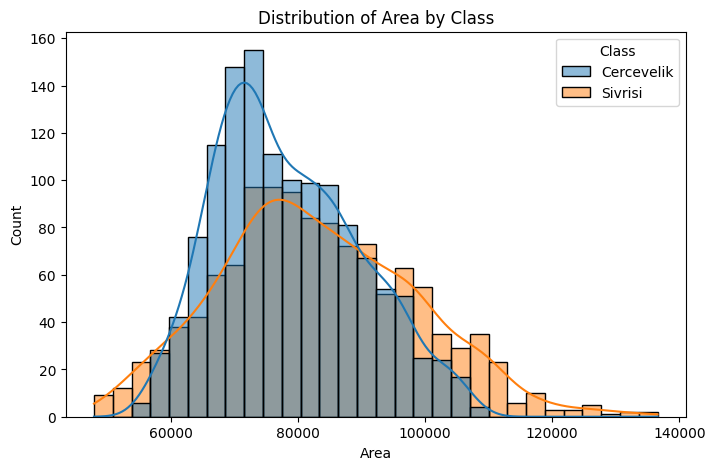

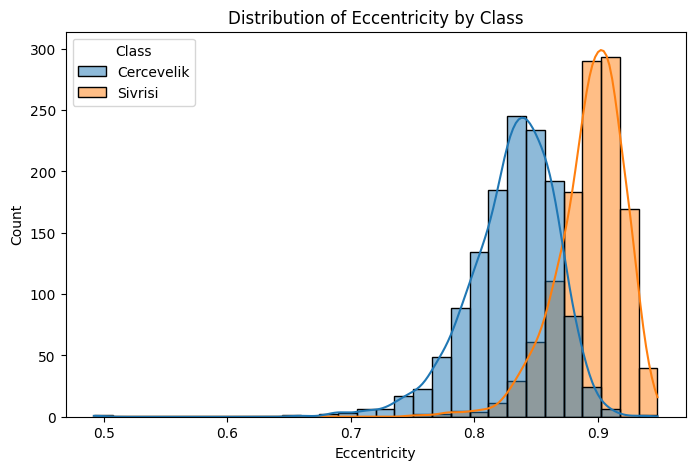

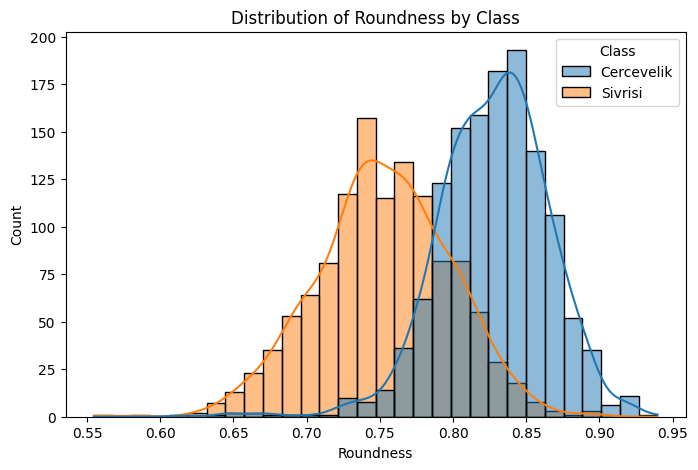

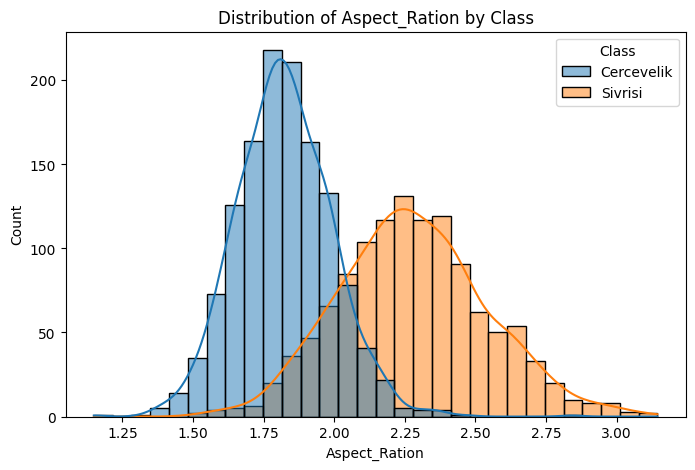

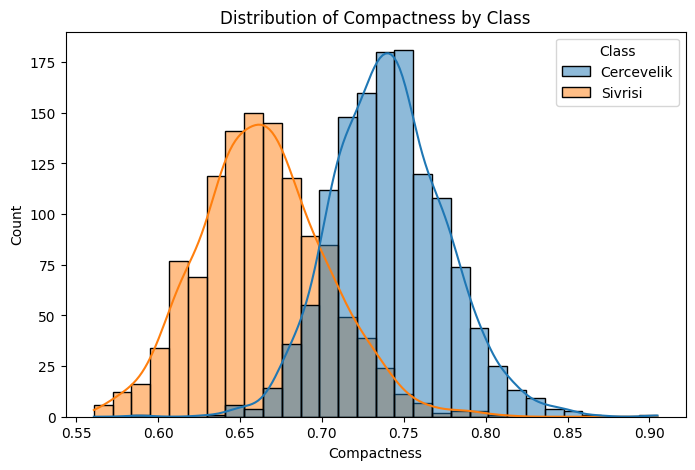

In [24]:
features = ['Area', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']
classes = df['Class']

# Visualize Feature Distributions
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='Class', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()

Based on the graphs above, each of the features shows varying degrees of separation between Cercevelik and Sivrisi. Aspect Ratio, Roundness, and Eccentricity provide particularly clear distinctions, suggesting that these shape-related features are strong indicators for classifying the seeds. Compactness and Area also contribute to the separability but with a bit more overlap.

More specifically:

- <b> Area Distribution </b> <br>
Cercevelik seeds generally have a lower area compared to Sivrisi seeds, as indicated by the peak of the blue distribution on the left side of the plot.
There is some overlap between the two classes, but Sivrisi seeds have a wider range of areas and tend to have higher values overall.<br><br>
- <b> Eccentricity Distribution </b> <br>
Cercevelik seeds have a slightly lower eccentricity on average compared to Sivrisi seeds. This suggests that Sivrisi seeds are more elongated, while Cercevelik seeds are closer to circular shapes.
The two classes are relatively well-separated in terms of eccentricity, indicating that this feature is useful for distinguishing between them.<br><br>
- <b> Roundness Distribution </b> <br>
Cercevelik seeds generally have higher roundness values than Sivrisi seeds, which supports the idea that Cercevelik seeds are more circular.
There is a noticeable distinction between the two classes, with limited overlap. This suggests that roundness is a good feature for class differentiation.<br><br>
- <b> Aspect Ratio Distribution </b><br>
Cercevelik seeds tend to have lower aspect ratios, indicating they are closer to being circular or evenly proportioned in length and width.
Sivrisi seeds have higher aspect ratios, aligning with the description of them being more elongated.
This feature has a clear separation between classes, making it highly effective for distinguishing between Cercevelik and Sivrisi.<br><br>
- <b> Compactness Distribution </b><br>
Cercevelik seeds have a higher compactness than Sivrisi seeds, indicating they are more similar in shape to a perfect circle with a given perimeter.
There is some overlap, but generally, the two classes show distinct peaks, suggesting that compactness can help in classification.


## 5c. Correlation Analysis

Correlation Matrix:
                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.928548           0.789133           0.685304   
Perimeter          0.928548   1.000000           0.946181           0.392913   
Major_Axis_Length  0.789133   0.946181           1.000000           0.099376   
Minor_Axis_Length  0.685304   0.392913           0.099376           1.000000   
Convex_Area        0.999806   0.929971           0.789061           0.685634   
Equiv_Diameter     0.998464   0.928055           0.787078           0.690020   
Eccentricity       0.159624   0.464601           0.704287          -0.590877   
Solidity           0.158388   0.065340           0.119291           0.090915   
Extent            -0.014018  -0.140600          -0.214990           0.233576   
Roundness         -0.149378  -0.500968          -0.684972           0.558566   
Aspect_Ration      0.159960   0.487880           0.729156          -0.598475   
Compactness       -0

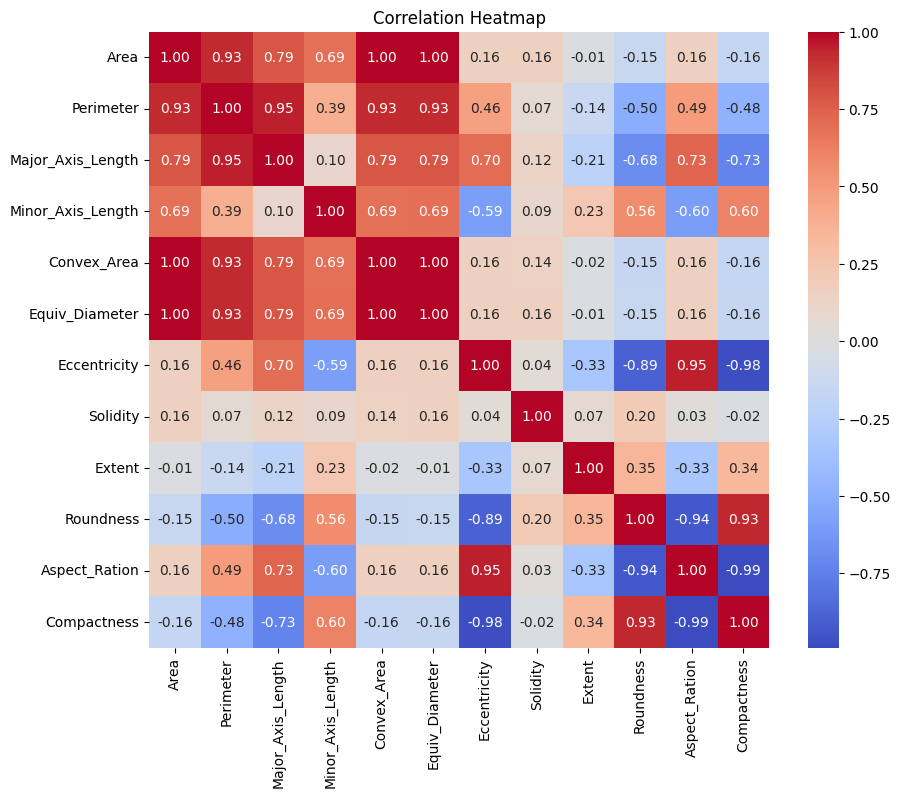

In [25]:
df = pd.DataFrame(data)

correlation_matrix = numerical_columns.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Area, Convex_Area, and Equiv_Diameter are highly correlated with each other (correlation close to 1). This is expected since these features are directly related to the size of the seed. Because they capture very similar information, including all these features in a model might lead to redundancy. Hence, it may be sufficient to keep just one of these in a model.

Perimeter has a strong correlation with Major_Axis_Length (correlation of 0.95), suggesting that larger perimeter values are associated with greater major axis lengths. This also indicates some redundancy, as these features may be measuring similar aspects of seed size and shape.

The Shape-related features show strong correlations with each other:
- Eccentricity and Aspect_Ration have a high positive correlation (0.95), meaning as eccentricity increases, so does the aspect ratio, which aligns with elongated shapes.
- Eccentricity and Compactness have a strong negative correlation (-0.98), indicating that more eccentric shapes (more elongated) have lower compactness.
- Roundness is also strongly correlated with Aspect_Ration (-0.94) and Compactness (0.93), showing that rounder seeds have a lower aspect ratio and higher compactness.

Given the high correlations among Eccentricity, Aspect_Ration, and Compactness, it may be another thing to consider by just choosing one or two of these to avoid redundancy.


Solidity and Extent have generally low correlations with other features, meaning they may capture unique aspects of seed shape or compactness that are not covered by other features.

## 5d. Pairwise Scatter Plots
Based on the Pairwise Scatter Plots below, the features Eccentricity, Roundness, and Aspect_Ration show strong separability between Cercevelik and Sivrisi, making them effective for classification. Compactness and Area also contribute to separability but to a lesser extent. The combination of shape-related features (like Eccentricity, Roundness, and Aspect_Ration) appears to be especially valuable for distinguishing the two classes, suggesting that shape is a more defining factor for classification than size.

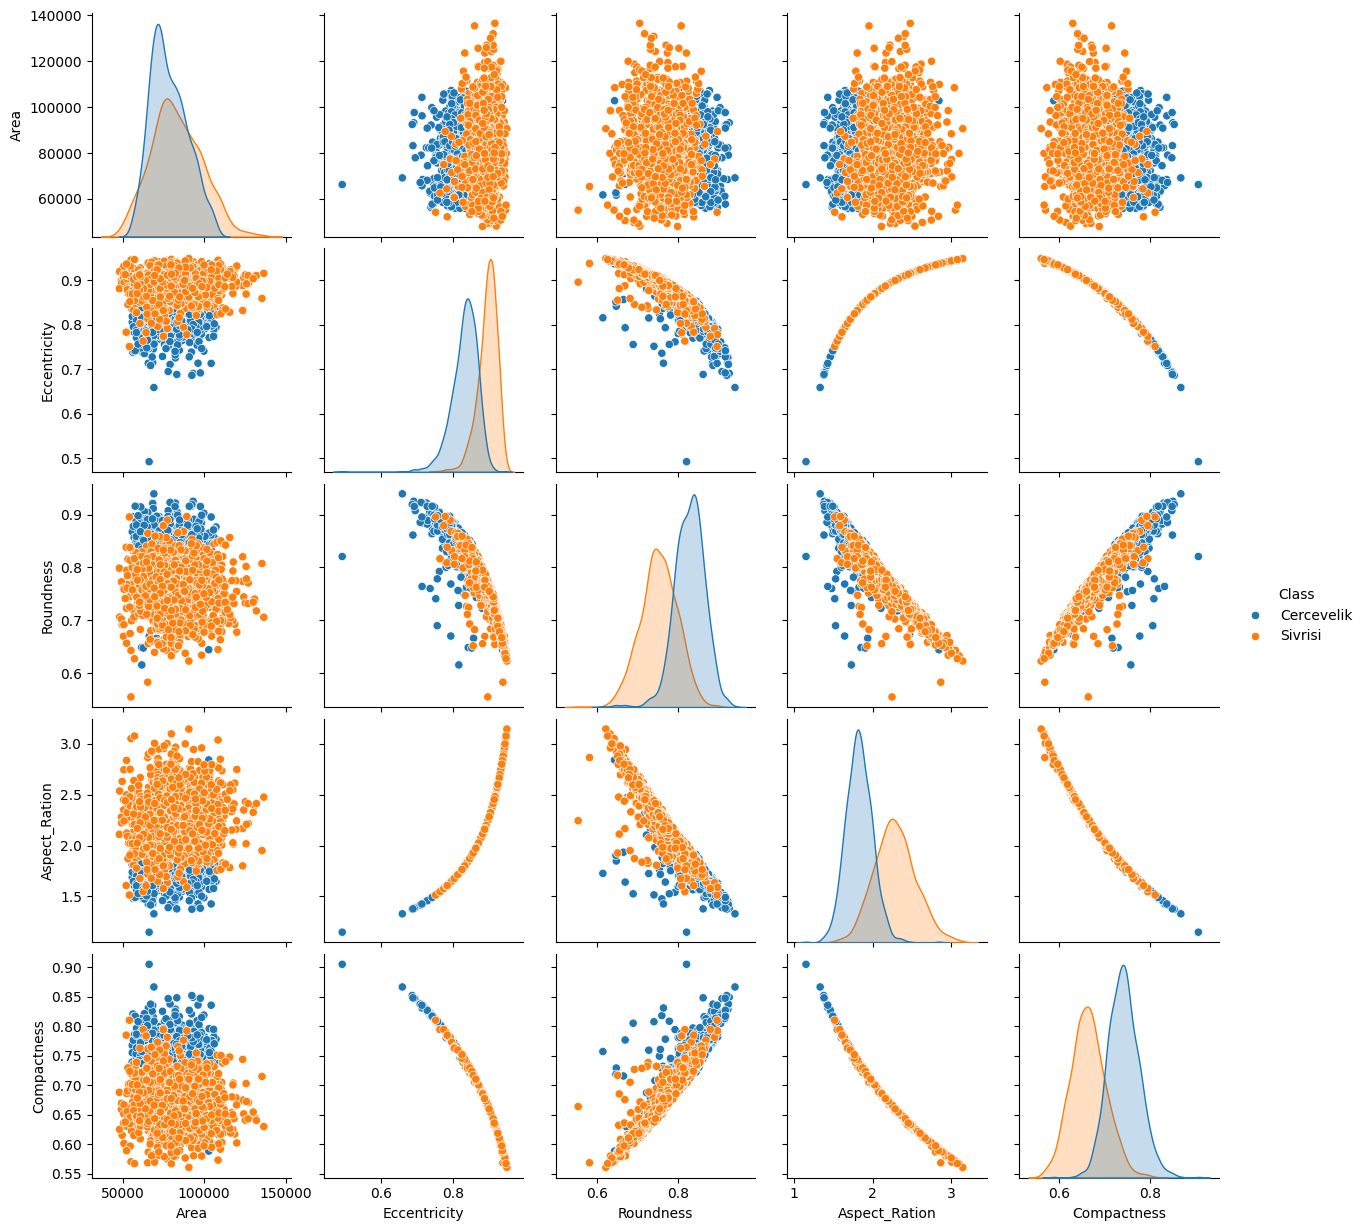

In [26]:
# Pairwise Scatter Plots
sns.pairplot(df[features + ['Class']], hue='Class', diag_kind='kde', height=2.5)
plt.show()

## 5e. Principal Component Analysis
The PCA (Principal Component Analysis) plot provides a two-dimensional representation of the data by reducing the features to two principal components (PCA1 and PCA2), which capture the most variance in the dataset.

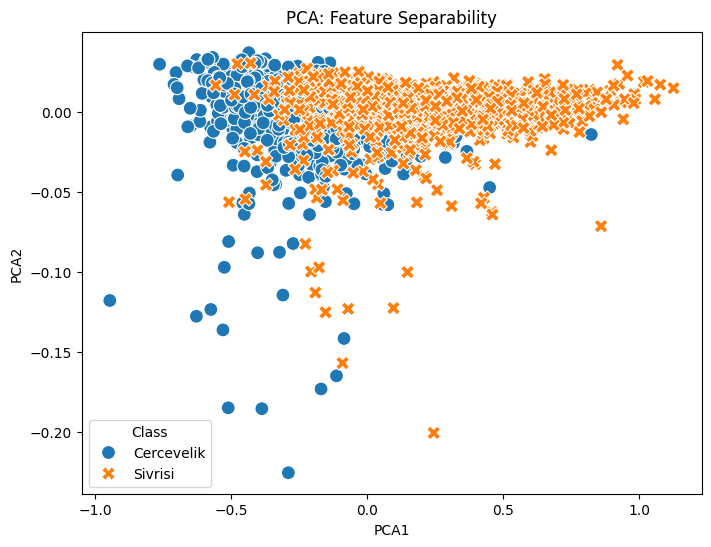

In [27]:
# Dimensionality Reduction
features = ['Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

Eccentricity, Roundness, Aspect_Ration, and Compactness are effective at distinguishing Cercevelik and Sivrisi, as seen by the general clustering of each class on opposite sides of PCA1. However, due to the overlap in the middle, these features alone may not perfectly separate the classes. Including additional features (such as Area) or exploring non-linear methods might further enhance separability.

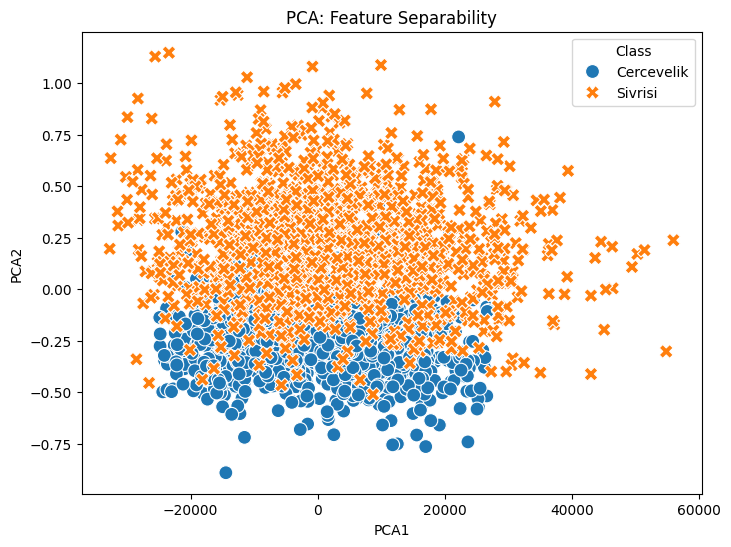

In [28]:
# Dimensionality Reduction
features = ['Area','Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

Adding Area to the set of features (alongside Eccentricity, Roundness, Aspect_Ration, and Compactness) has improved the separability of the Cercevelik and Sivrisi classes in the PCA plot. This suggests that both size (represented by Area) and shape-related features are important for distinguishing these classes effectively. The improvement in separability implies that a classification model trained on this combination of features would likely perform better than one trained without Area.


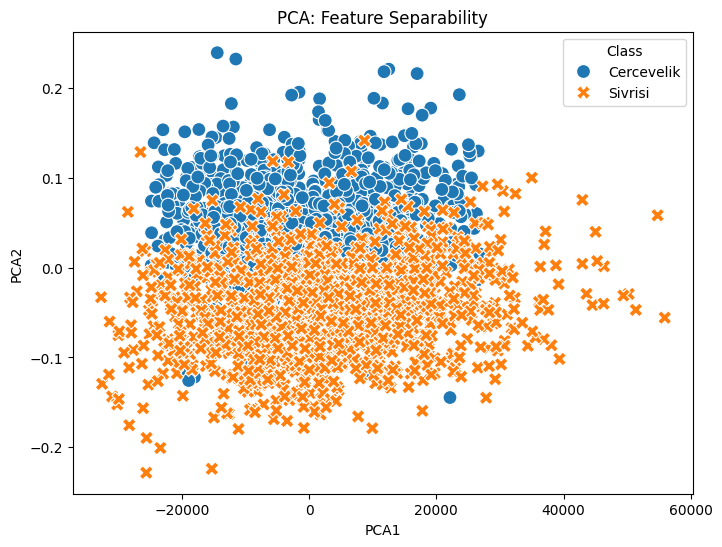

In [29]:
# Dimensionality Reduction
features = ['Area','Eccentricity', 'Roundness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

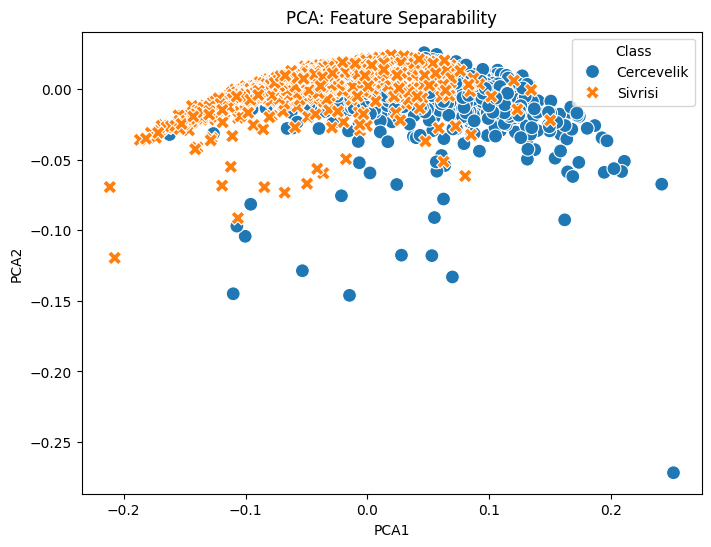

In [32]:
# Dimensionality Reduction
features = ['Eccentricity', 'Roundness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()